In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Shape

In [4]:
data.shape

(10000, 14)

## columns

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
gender_count = data["Gender"].value_counts()
gender_count

Gender
Male      5457
Female    4543
Name: count, dtype: int64

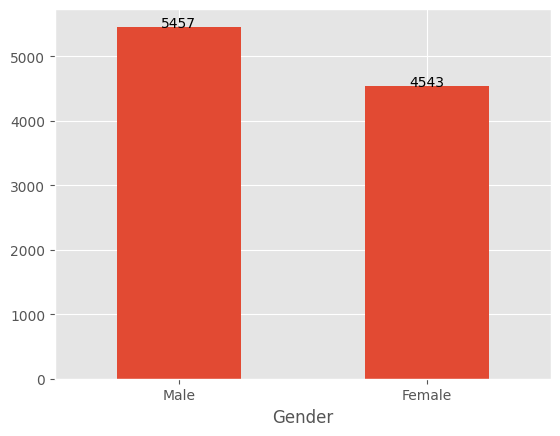

In [9]:
gender_count.plot(kind="bar")
for i, j in enumerate(gender_count):
    plt.text(i, j, j, ha="center")
plt.xticks(rotation=0)
plt.show()

In [10]:
norm_count = data["Gender"].value_counts(normalize=True)
norm_count.index

Index(['Male', 'Female'], dtype='object', name='Gender')

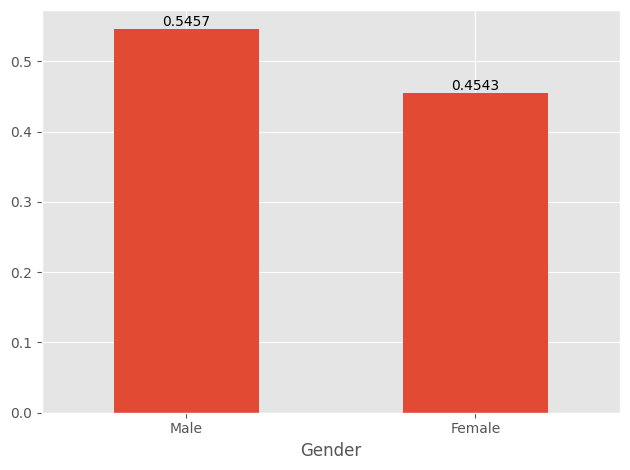

In [11]:
norm_count.plot(kind="bar")
for i, j in enumerate(norm_count):
    plt.text(i, j, j, ha="center", va="bottom")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
data["Gender"].nunique()

2

In [13]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

# Geography

In [14]:
data["Geography"].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [15]:
def cat_analysis(data, columns):
    size = len(columns)
    plt.figure(figsize=(8 * size, 5))

    for j, i in enumerate(columns):
        norm_count = data[i].value_counts(normalize=True)
        n_unique = data[i].nunique()
        plt.subplot(1, size, j + 1)
        sns.barplot(y=norm_count, x=norm_count.index)
        plt.ylabel("{}".format(i), fontsize=15)
        plt.title(f"{i} univariate analysis")
        for i, j in enumerate(norm_count):
            plt.text(i, j, j, ha="left", va="bottom")
        plt.xlabel("percentage", fontsize=15)
        plt.subplots_adjust()
    plt.show()

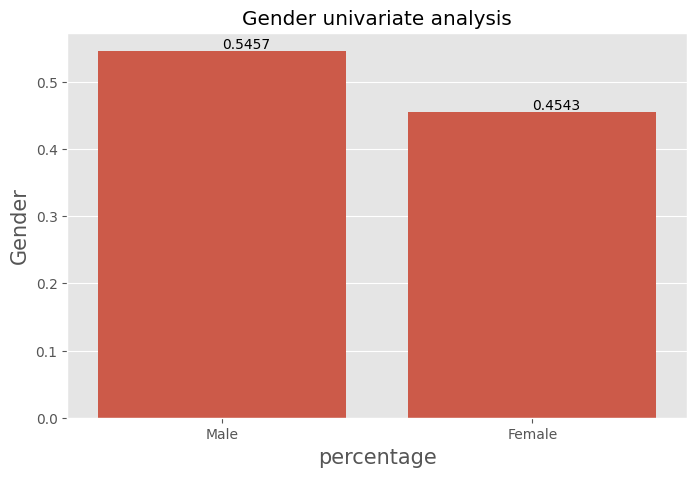

In [16]:
cat_analysis(data, ["Gender"])

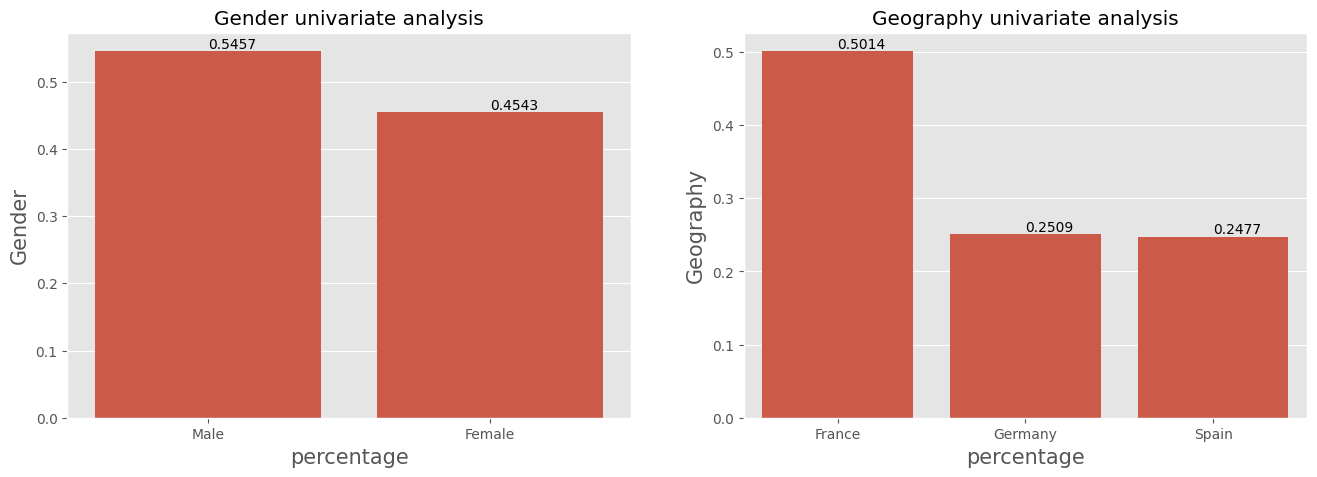

In [17]:
cat_analysis(data, ["Gender", "Geography"])

In [25]:
# cat = data.select_dtypes(include="object").columns
cat = [x for x in data.columns if data[x].dtype == "O"]
cat

['Surname', 'Geography', 'Gender']

In [26]:
data["Surname"].nunique()

2932

In [23]:
data.drop("Surname", axis=1, inplace=True)

In [24]:
data.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

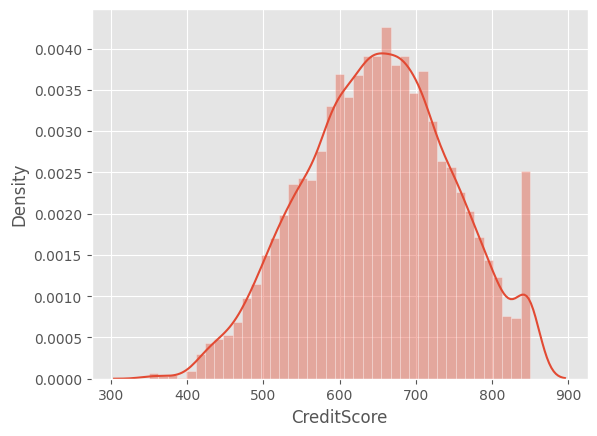

In [29]:
sns.histplot(
    data["CreditScore"],
    kde=True,
    kde_kws=dict(cut=3),
    stat="density",
    alpha=0.4,
    edgecolor=(1, 1, 1, 0.4),
)
plt.show()

In [45]:
data["CreditScore"].skew()

1.0113202630234552

In [79]:
def uni_analysis(data, i):
    percentiles = [25, 50, 75]
    statistics = {
        'min': 'min',
        'max': 'max',
        'mean': 'mean',
        'median': 'median',
        'std': 'std',
        'skew': 'skew',
        'kurt': 'kurtosis'
    }

    for p in percentiles:
        statistics[f'{p}_percentile'] = lambda x, p=p: x.quantile(p / 100)

    # Now use .agg()
    result = data[i].agg(statistics)

    return result

# Assuming you have your DataFrame named 'data'
# Call the function with the DataFrame and column index
column_index = 'Age'
result = uni_analysis(data, column_index)
print(result)


min              18.000000
max              92.000000
mean             38.921800
median           37.000000
std              10.487806
skew              1.011320
kurt              1.395347
25_percentile    32.000000
50_percentile    37.000000
75_percentile    44.000000
Name: Age, dtype: float64


In [85]:
def num_analysis(data, columns):
    size = len(columns)
    plt.figure(figsize=(8 * size, 5))

    for j, i in enumerate(columns):
        plt.subplot(1, size, j + 1) 
        sns.histplot(
            data[i],
            kde=True,
            stat="density",
            kde_kws=dict(cut=3),
            alpha=0.4,
        )
        plt.xlabel("{}".format(i), fontsize=15)
        plt.ylabel("desity", fontsize=15)
        plt.title("{}".format(uni_analysis(data,i)))

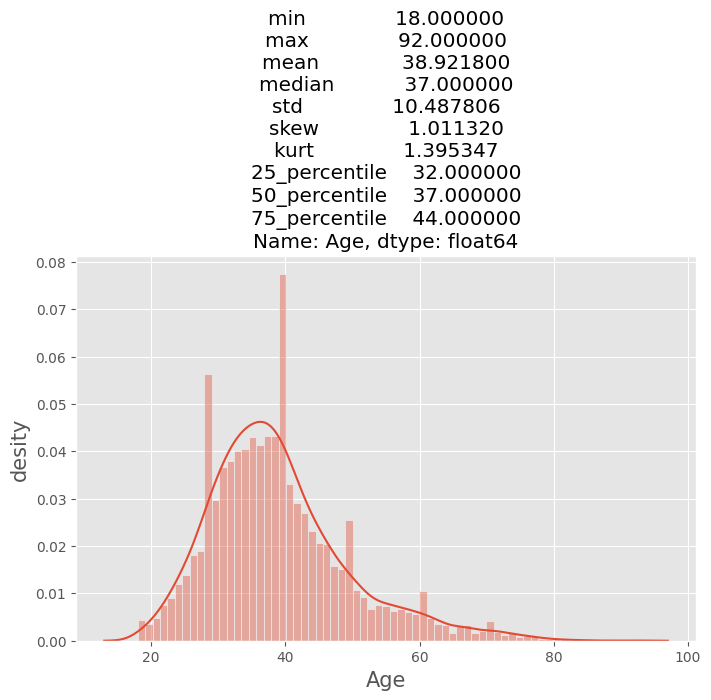

In [86]:
num_analysis(data, ["Age"])

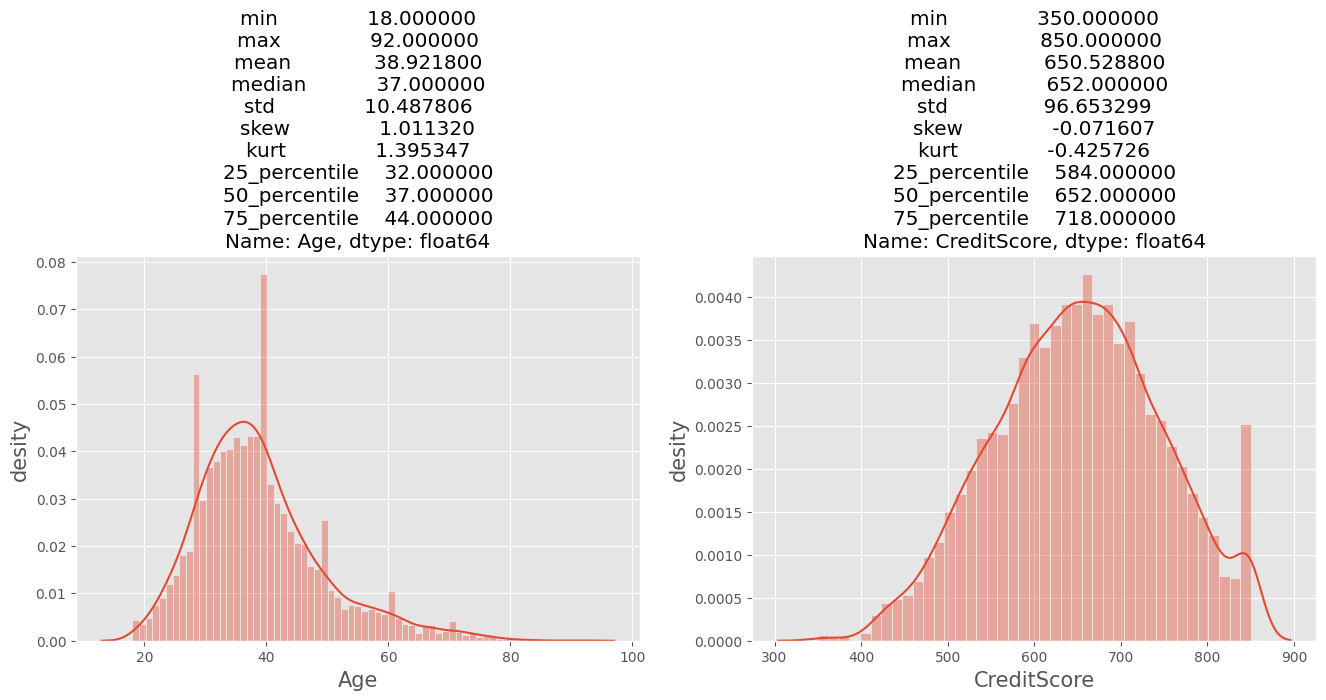

In [84]:
num_analysis(data, ["Age", "CreditScore"])

In [31]:
class Eda:
    def cat_analysis(data, columns):
        size = len(columns)
        plt.figure(figsize=(8 * size, 5))

        for j, i in enumerate(columns):
            norm_count = data[i].value_counts(normalize=True)
            n_unique = data[i].nunique()
            plt.subplot(1, size, j + 1)  # 1 row  (size) columns  (j+1)graph position
            sns.barplot(x=norm_count, y=norm_count.index)
            plt.xlabel("percentage", fontsize=15)
            plt.ylabel("{}".format(i), fontsize=15)
            plt.title("n_unique={}\n value counts\n {}".format(n_unique, norm_count))

    def num_analysis(data, columns):
        size = len(columns)
        plt.figure(figsize=(8 * size, 5))

        for j, i in enumerate(columns):
            mini = data[i].min()
            maxi = data[i].max()
            mean = data[i].mean()
            median = data[i].median()
            std = data[i].std()
            skew = data[i].skew()
            kurt = data[i].kurtosis()

            plt.subplot(1, size, j + 1)  # 1 row  (size) columns  (j+1)graph position
            sns.histplot(
                data[i],
                kde=True,
                stat="density",
                kde_kws=dict(cut=3),
                alpha=0.4,
                edgecolor=(1, 1, 1, 0.4),
            )
            sns.kdeplot(data[i])
            plt.xlabel("{}".format(i), fontsize=15)
            plt.ylabel("desity", fontsize=15)
            plt.title(
                "min={}\n max={}\nmean={}\n median={}\nstd={}\n skew={}\nkurt={}".format(
                    mini, maxi, mean, median, std, skew, kurt
                )
            )

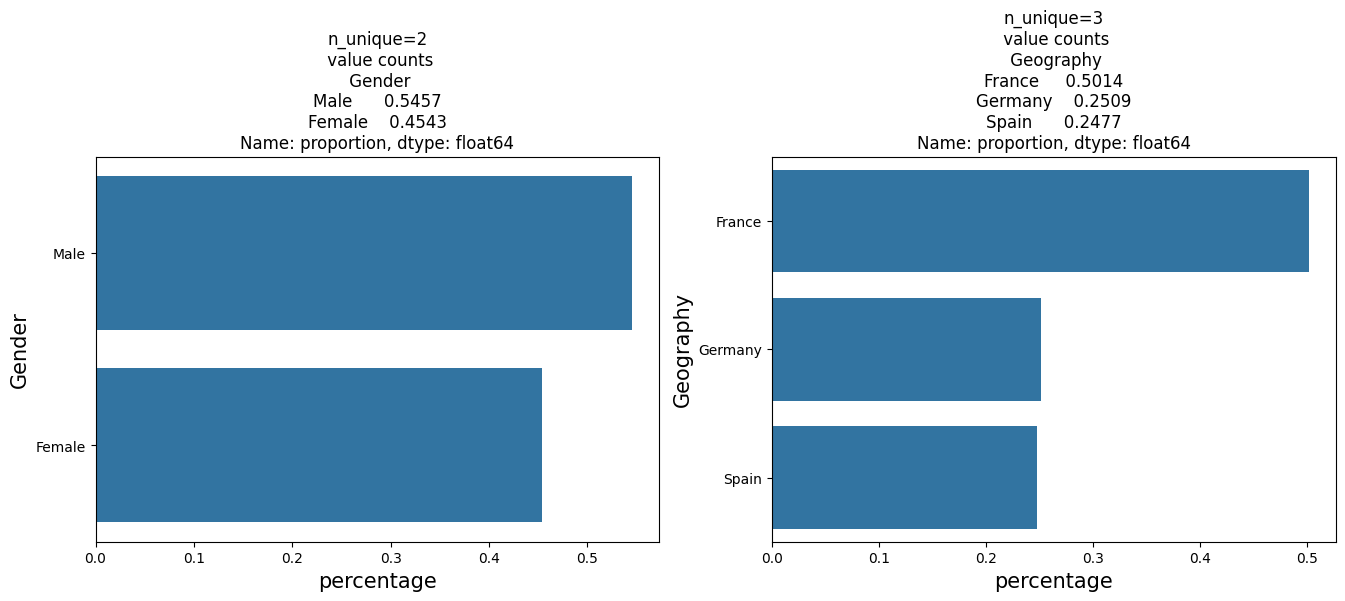

In [32]:
Eda.cat_analysis(data, ["Gender", "Geography"])

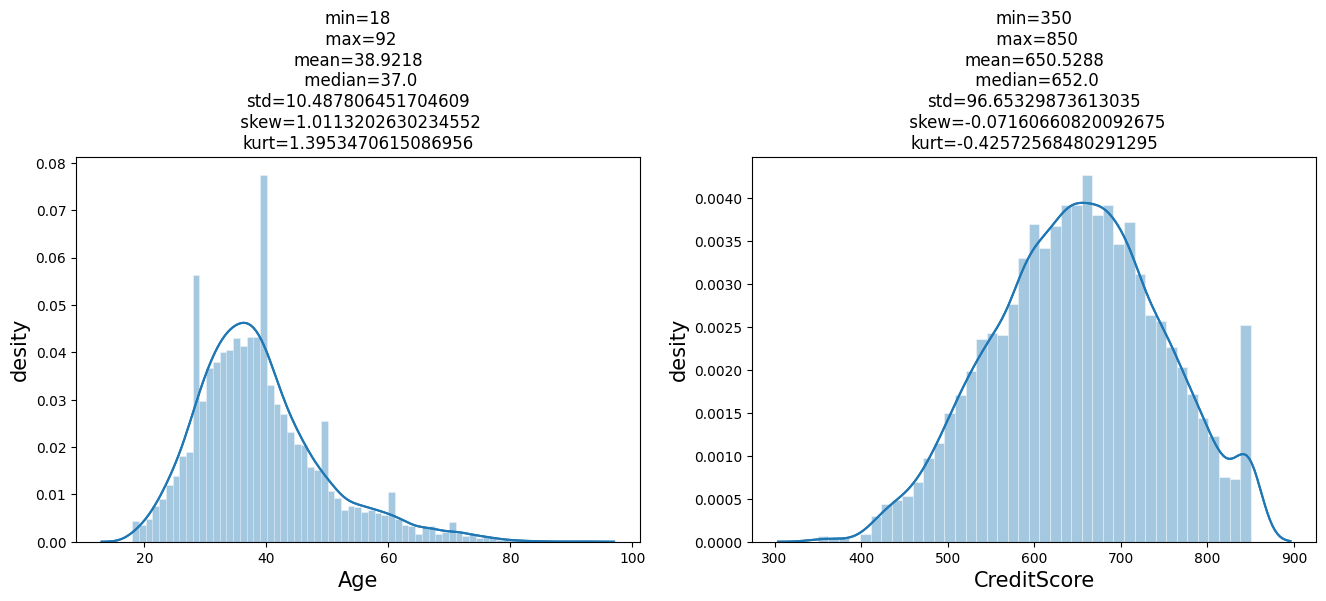

In [33]:
Eda.num_analysis(data, ["Age", "CreditScore"])

<Axes: ylabel='Age'>

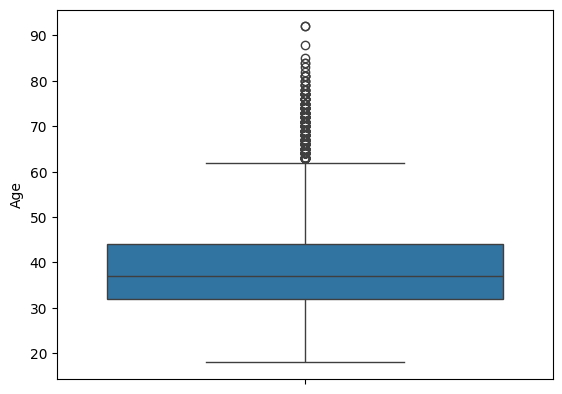

In [34]:
sns.boxplot(data["Age"])